In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



In [9]:
def dataframe_to_x_y(df, feature, target):
  X_train, y_train = [], []
  X_val, y_val = [], []
  n = len(df)
  split_index = int(n * 0.8)
  X_train = df[feature][:split_index]
  y_train = df[target][:split_index]
  X_val = df[feature][split_index:]
  y_val = df[target][split_index:]
  return X_train, y_train, X_val, y_val

In [10]:
sentiment_feature_selected = [
    'Investor Sentiment', 'time_distance_from_sa_to_close_minutes', 'mean_sentiment_norm',
    'time_distance_from_sa_to_close_minutes_p1d', 'company_communication_p1d',
    'Company Communication', 'Price Action', 'reputation_p1d', 'Financial',
    'std_sentiment_score', 'std_sentiment_score_p1d', 
    'risks_p1d', 'Sales', 'Volatility', 'conditions_p1d', 'Technical Analysis',
    'Strategy', 'strategy_p1d', 'sum_positive_sa', 'Signal', 'mean_sentiment_norm_p1d'
]

ta_fa_feature_selected = [
    'roc_vn30', 'volume_ma_vn30', 'bb_bbh_bb_bbl_ratio', '%K_vni', 'bb_bbp_vn30', 'roc_5', 'obv_vni', 'roc_vni',
    'rsi_vni', 'ema_26_vni', 'volume_to_volume_ma_ratio_vni', 'rsi_vn30', 'z_score_5d', 'sma_50_vn30',
    'rsi_rsi_base_ma_ratio_vn30', 'bb_bbh_vni', 'volume_ma_vni', 'bb_bbp_vni', 'volume_to_volume_ma_ratio_vn30',
    'cci_vni', 'bb_bbl_vni', '%K_vn30', 'bb_bbl', 'rsi_base_ma_vn30', 'obv_vn30', 'rsi_rsi_base_ma_ratio_vni',
    'distance_to_nearest_quarter', 'cci_vn30', 'ema_12_vn30', 'rsi_base_ma_vni', 'sharpe_like_5d', 'ema_12_vni', 'sma_50_vni',
    'macd', 'annual_return', 'bb_bbh_vn30', 'sma_20_vn30', 'ema_26_vn30', 'bb_bbl_vn30', 'sma_20_vni'
]
features = ta_fa_feature_selected + sentiment_feature_selected
target = 'target'

In [11]:
def load_data_for_analysis(tickers, folder_path):

    df_all = []

    for ticker in tickers:
        file_path = os.path.join(folder_path, f"{ticker}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path)
            df["ticker"] = ticker  # thêm cột ticker
            df_all.append(df)
        else:
            print(f"⚠️ Không tìm thấy: {file_path}")

    # Gộp lại thành 1 DataFrame
    df_global = pd.concat(df_all, ignore_index=True)
    print(f"✅ Đã load xong {len(df_global)} dòng dữ liệu từ {len(df_all)} cổ phiếu.")
    return df_global

In [12]:
tickers = ['ACB', 'BCM', 'BID','BVH','CTG','FPT','GAS','GVR','HDB','HPG',
                    'LPB','MBB','MSN','MWG','PLX','SAB','SHB','SSB','SSI','STB',
                    'TCB','TPB','VCB','VHM','VIB','VIC','VJC','VNM','VPB','VRE']
folder_path_train = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\stock_trend\train_data" 
folder_path_test = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\stock_trend\test_data" 
df_global_train = load_data_for_analysis(tickers, folder_path_train)
df_global_test = load_data_for_analysis(tickers, folder_path_test)


✅ Đã load xong 35865 dòng dữ liệu từ 30 cổ phiếu.
✅ Đã load xong 7380 dòng dữ liệu từ 30 cổ phiếu.


Tỷ lệ ngày có biến động nhỏ hơn ±1%: 50.62%
Tỷ lệ ngày có biến động lớn hơn ±1%: 49.38%
Threshold ±0.5%: 30.51% ngày được gán nhãn Unchanged
Threshold ±1%: 50.62% ngày được gán nhãn Unchanged
Threshold ±1.5%: 65.40% ngày được gán nhãn Unchanged
Threshold ±2%: 75.36% ngày được gán nhãn Unchanged


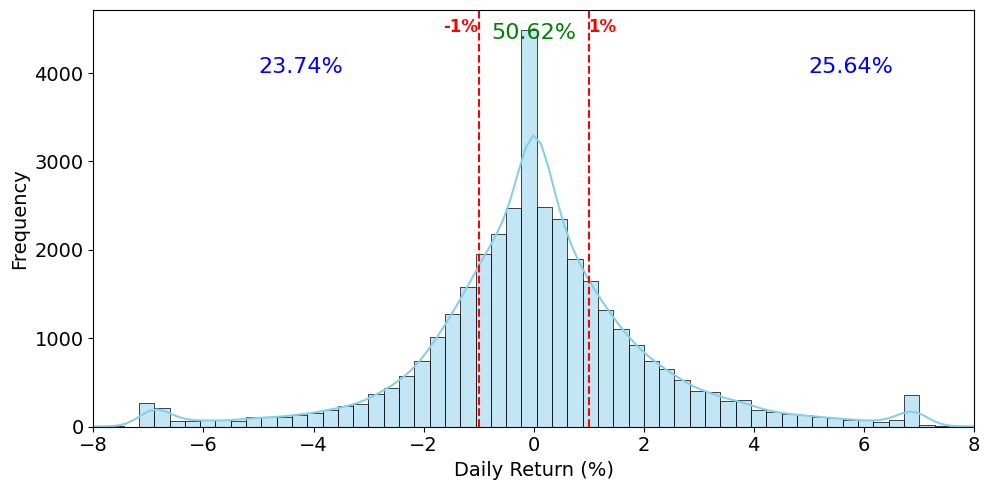

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df_global_train có cột 'ticker', 'time', 'close'
returns = []
for ticker in df_global_train['ticker'].unique():
    df = df_global_train[df_global_train['ticker'] == ticker].sort_values('time')
    daily_return = df['close'].pct_change() * 100
    returns.extend(daily_return.dropna().values)

returns = np.array(returns)

# Tính tỷ lệ biến động nhỏ hơn 1%
pct_below_1 = np.mean(np.abs(returns) < 1) * 100
pct_above_1 = np.mean(np.abs(returns) >= 1) * 100
print(f"Tỷ lệ ngày có biến động nhỏ hơn ±1%: {pct_below_1:.2f}%")
print(f"Tỷ lệ ngày có biến động lớn hơn ±1%: {pct_above_1:.2f}%")

# Sensitivity cho các ngưỡng khác
for threshold in [0.5, 1, 1.5, 2]:
    unchanged = np.mean(np.abs(returns) < threshold) * 100
    print(f"Threshold ±{threshold}%: {unchanged:.2f}% ngày được gán nhãn Unchanged")

# Vẽ biểu đồ phân phối với annotation

plt.figure(figsize=(10,5))
sns.histplot(returns, bins=100, kde=True, color='skyblue', label='Daily Returns')

# Vẽ đường ±1%
plt.axvline(x=1, color='red', linestyle='--')
plt.axvline(x=-1, color='red', linestyle='--')

# Thêm nhãn cho hai đường
plt.text(1, plt.ylim()[1]*0.98, '1%', color='red', ha='left', va='top', fontsize=12, fontweight='bold')
plt.text(-1, plt.ylim()[1]*0.98, '-1%', color='red', ha='right', va='top', fontsize=12, fontweight='bold')

# Giới hạn trục hoành để biểu đồ rõ hơn
plt.xlim(-8, 8)

# Tính phần trăm dữ liệu trong 3 vùng
pct_left = np.mean(returns < -1) * 100
pct_mid = np.mean((returns >= -1) & (returns <= 1)) * 100
pct_right = np.mean(returns > 1) * 100

# Thêm annotation lên biểu đồ, đặt lệch sang trái/phải và cao hơn
plt.annotate(f'{pct_left:.2f}%', xy=(-5, plt.ylim()[1]*0.85), color='blue', fontsize=16)
plt.annotate(f'{pct_mid:.2f}%', xy=(0, plt.ylim()[1]*0.93), color='green', fontsize=16, ha='center')
plt.annotate(f'{pct_right:.2f}%', xy=(5, plt.ylim()[1]*0.85), color='blue', fontsize=16)

plt.xlabel('Daily Return (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.title('Distribution of Daily Returns with ±1% Threshold', fontsize=14)
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()